# 对单张图像进行测试

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [14]:
#类别的标签
classes = ['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih-Tzu', 'Blenheim_spaniel',
                 'papillon', 'toy_terrier', 'basset', 'Siberian_husky']
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize])

In [13]:
# 加载测试图像的路径
path=r'.\data\dog\n02085620_473.jpg'
image = Image.open(path)
image_transformed = test_augs(image)
print(image_transformed.size())
image_transformed = image_transformed.unsqueeze(0)


torch.Size([3, 224, 224])


[('Chihuahua', '0.93'), ('toy_terrier', '0.07'), ('Siberian_husky', '0.00'), ('papillon', '0.00'), ('basset', '0.00')]


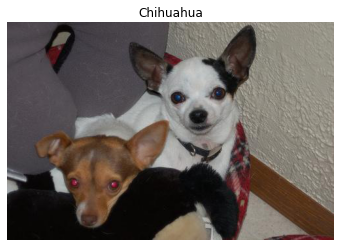

In [16]:
model_name='resnet18-1.params' #训练模型跑出来的文件名，名称要一致否则找不到
finetune_net = torchvision.models.resnet18(pretrained=True)

finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 10)
finetune_net.load_state_dict(torch.load(model_name,map_location='cpu'))
finetune_net.eval()
output = finetune_net(image_transformed)
predict_value, predict_idx = torch.max(output, 1)  # 求指定维度的最大值，返回最大值以及索引
_, indices = torch.sort(output, descending=True)
# 返回每个预测值的百分数
percentage = torch.nn.functional.softmax(output, dim=1)[0] 
 
print([(classes[idx], '%.2f' %percentage[idx].item()) for idx in indices[0][:5]])
plt.figure()
plt.imshow(np.array(image))
plt.title(classes[predict_idx])
plt.axis('off')

plt.show();